In [1]:
import pandas as pd
import numpy as np

import torch
import matplotlib.pyplot as plt

/home/venger/miniconda3/envs/py37/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
n_bins=10



In [5]:
filename = '/home/venger/phd/distill_abstraction/eval_results/TinyBERT_4L_312D_3ep_stg1_2_aug/RTE_on_train/eval_results.csv'
df = pd.read_csv(filename)
display(df.head())

confidence_class0 = df.p0
confidence_class1 = df.p1

predictions_class0 = pd.Series(np.zeros(confidence_class0.shape))
predictions_class1 = pd.Series(np.ones(confidence_class1.shape))

accuracies_class0 = predictions_class0==df.label
accuracies_class1 = predictions_class1==df.label

,pred,p0,p1,label
0,1,0.293524,0.706476,1
1,0,0.529509,0.470491,0
2,1,0.496881,0.503119,0
3,0,0.577542,0.422458,0
4,1,0.283833,0.716167,1


In [85]:
confidence_class0

0       0.293524
1       0.529509
2       0.496881
3       0.577542
4       0.283833
          ...   
2485    0.336374
2486    0.547314
2487    0.125851
2488    0.633075
2489    0.380149
Name: p0, Length: 2490, dtype: float64

In [86]:
predictions_class0

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2485    0.0
2486    0.0
2487    0.0
2488    0.0
2489    0.0
Length: 2490, dtype: float64

In [87]:
accuracies_class0

0       False
1        True
2        True
3        True
4       False
        ...  
2485    False
2486     True
2487    False
2488     True
2489    False
Length: 2490, dtype: bool

In [131]:
def ece_calc(filename, display=False, n_bins=10):
    ece = 0
    avg_confidence_in_bin_list = []
    accuracy_in_bin_list = []
    bin_boundaries = torch.linspace(0, 1, n_bins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]

    df = pd.read_csv(filename)
    confidence_class0 = df.p0
    confidence_class1 = df.p1

    predictions_class0 = pd.Series(np.zeros(confidence_class0.shape))
    predictions_class1 = pd.Series(np.ones(confidence_class1.shape))
    
    accuracies_class0 = predictions_class0==df.label
    accuracies_class1 = predictions_class1==df.label
    
    
    accuracies = pd.concat([accuracies_class0, accuracies_class1])
    confidences = pd.concat([confidence_class0, confidence_class1])
    predictions = pd.concat([predictions_class0, predictions_class1])

    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        # Calculated |confidence - accuracy| in each bin
        in_bin = confidences.gt(bin_lower.item()) * confidences.le(bin_upper.item())
        prop_in_bin = in_bin.mean()
    #     print(f"upper = {bin_lower.item()}, lowe={bin_upper.item()}")
    #     print(prop_in_bin)
        if prop_in_bin > 0:
            accuracy_in_bin = accuracies[in_bin].mean()
            avg_confidence_in_bin = confidences[in_bin].mean()
            ece += np.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin
            avg_confidence_in_bin_list.append(avg_confidence_in_bin)
            accuracy_in_bin_list.append(accuracy_in_bin)
    filename_str = '/'.join(filename.split('/')[6:])
    print(f'{filename_str}: {ece*100}')
    
    if display:
        f, ax = plt.subplots(figsize=(4, 4))
        ax.plot(avg_confidence_in_bin_list, accuracy_in_bin_list)
        ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
        plt.xlabel('confidence', fontsize=12)
        plt.ylabel('accuracy', fontsize=12)
        plt.show()
    return ece

In [98]:
ece_calc('/home/venger/phd/distill_abstraction/eval_results/TinyBERT_4L_312D_3ep_stg1_2_aug/RTE_on_train/eval_results.csv')


TinyBERT_4L_312D_3ep_stg1_2_aug/RTE_on_train/eval_results.csv: 0.19631867448249496


0.19631867448249496

In [52]:
mypath='/home/venger/phd/distill_abstraction/_eval_output/'

In [55]:
eval_files_list = []
import os
for path, subdirs, files in os.walk(mypath):
    for name in files:
        eval_files_list.append(os.path.join(path, name))

In [56]:
len(eval_files_list)

68

TinyBERT_4L_312D/MRPC_on_train/eval_results.csv: 3.225903768364582


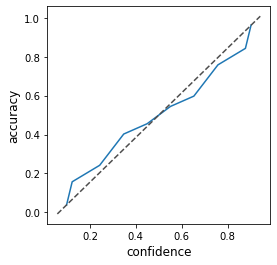

TinyBERT_4L_312D/QNLI_on_train/eval_results.csv: 7.169647375047471


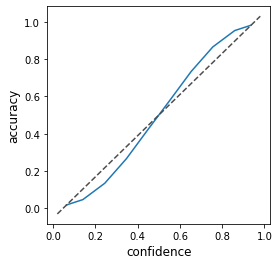

TinyBERT_4L_312D/QQP_on_train/eval_results.csv: 5.908404057743728


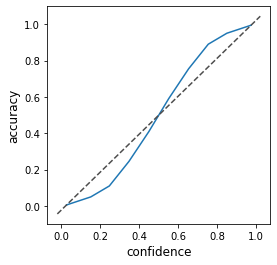

TinyBERT_4L_312D/RTE_on_train/eval_results.csv: 19.631867448249494


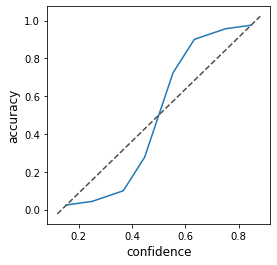

TinyBERT_4L_312D/SST-2_on_train/eval_results.csv: 3.2851098128999263


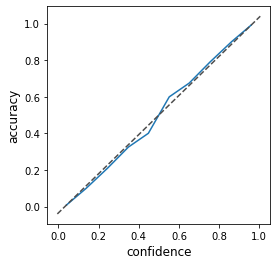

TinyBERT_6L_768D/MRPC_on_train/eval_results.csv: 2.6747637141938743


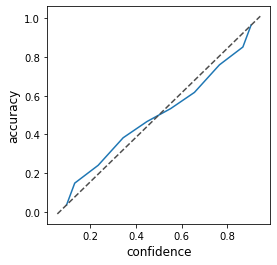

TinyBERT_6L_768D/QNLI_on_train/eval_results.csv: 9.524026364832102


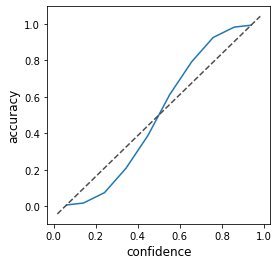

TinyBERT_6L_768D/QQP_on_train/eval_results.csv: 7.0130036029722955


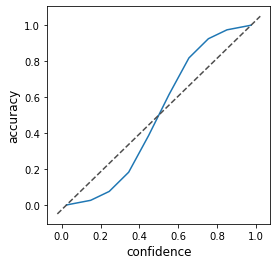

TinyBERT_6L_768D/RTE_on_train/eval_results.csv: 19.601645548510024


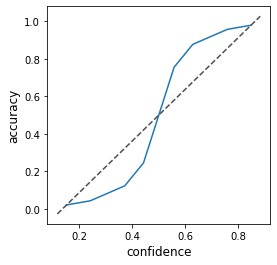

TinyBERT_6L_768D/SST-2_on_train/eval_results.csv: 3.4790544469449847


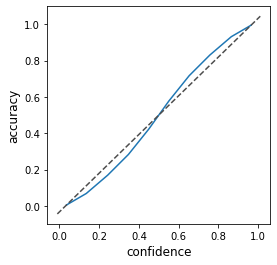

bert-base-uncased-QNLI/QNLI_on_train/eval_results.csv: 9.318473490888262


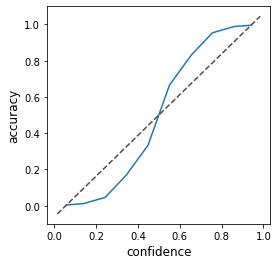

bert-base-uncased-QQP/QQP_on_train/eval_results.csv: 7.431027747194873


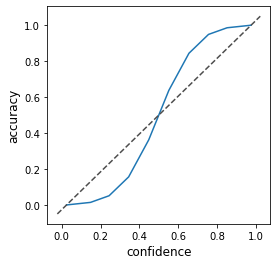

bert-base-uncased-finetuned-mrpc/MRPC_on_train/eval_results.csv: 2.393772631412374


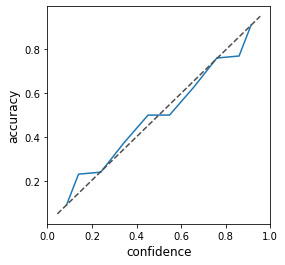

bert-base-uncased-finetuned-sst2/SST-2_on_train/eval_results.csv: 3.5957869774793734


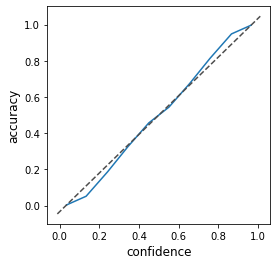

bert-base-uncased-rte/RTE_on_train/eval_results.csv: 22.111614847249054


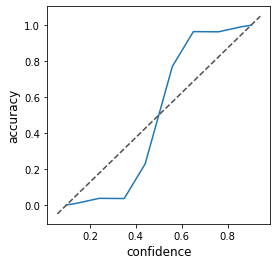

In [132]:
for file in sorted(eval_files_list):
    if 'K/' not in file and 'traintest' not in file and '_on_train' in file:
        ece_calc(file, display=True)

In [104]:
# Distillation preserves ECE, but again ece looks at the whole distribution

In [107]:
for file in sorted(eval_files_list):
    if 'K/' not in file and 'traintest' not in file:
        ece_calc(file)

TinyBERT_4L_312D/MRPC_on_eval/eval_results.csv: 6.750392343255057
TinyBERT_4L_312D/MRPC_on_train/eval_results.csv: 3.225903768364582
TinyBERT_4L_312D/QNLI_on_eval/eval_results.csv: 3.0799476136938444
TinyBERT_4L_312D/QNLI_on_train/eval_results.csv: 7.169647375047471
TinyBERT_4L_312D/QQP_on_eval/eval_results.csv: 3.3393559811102156
TinyBERT_4L_312D/QQP_on_train/eval_results.csv: 5.908404057743728
TinyBERT_4L_312D/RTE_on_eval/eval_results.csv: 7.148856079266386
TinyBERT_4L_312D/RTE_on_train/eval_results.csv: 19.631867448249494
TinyBERT_4L_312D/SST-2_on_eval/eval_results.csv: 3.2697562809708884
TinyBERT_4L_312D/SST-2_on_train/eval_results.csv: 3.2851098128999263
TinyBERT_6L_768D/MRPC_on_eval/eval_results.csv: 6.191296977739706
TinyBERT_6L_768D/MRPC_on_train/eval_results.csv: 2.6747637141938743
TinyBERT_6L_768D/QNLI_on_eval/eval_results.csv: 6.347395321833312
TinyBERT_6L_768D/QNLI_on_train/eval_results.csv: 9.524026364832102
TinyBERT_6L_768D/QQP_on_eval/eval_results.csv: 3.678322806965325


## Old stuff

In [4]:
bin_boundaries = torch.linspace(0, 1, n_bins + 1)

In [5]:
df = pd.read_csv('/home/venger/phd/distill_abstraction/eval_results/TinyBERT_4L_312D_3ep_stg1_2_aug/RTE_on_train/eval_results.csv')

In [7]:
accuracy = sum(df.pred==df.label)/df.shape[0]
display(f'Overall accuracy {accuracy}')

'Overall accuracy 0.8441767068273093'

In [8]:
# need to stack since we want to know the confidence of the wrong predictions 
# ignore 'pred' column
# TODO: in the results creation do not save pred 

confidence_class0 = df.p0
confidence_class1 = df.p1

accuracies_class0 = df.pred==df.label
accuracies_class1 = df.pred==df.label

predictions_class0 = df.p0 > 0.5
predictions_class1 = df.p1 > 0.5

In [17]:
accuracies = pd.concat([accuracies_class0, accuracies_class1])
confidences = pd.concat([confidence_class0, confidence_class1])
predictions = pd.concat([predictions_class0, predictions_class1])

In [10]:
predictions

0       False
1        True
2       False
3        True
4       False
        ...  
2485     True
2486    False
2487     True
2488    False
2489     True
Length: 4980, dtype: bool

In [12]:
ece = torch.zeros(1)

In [14]:
ece.shape

torch.Size([1])

In [15]:
bin_lowers = bin_boundaries[:-1]
bin_uppers = bin_boundaries[1:]


for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
    print(f"upper = {bin_lower.item()}, lowe={bin_upper.item()}")
#     in_bin = confidences.gt(bin_lower.item()) * confidences.le(bin_upper.item())
#     prop_in_bin = in_bin.float().mean()

upper = 0.0, lowe=0.10000000149011612
upper = 0.10000000149011612, lowe=0.20000000298023224
upper = 0.20000000298023224, lowe=0.30000001192092896
upper = 0.30000001192092896, lowe=0.4000000059604645
upper = 0.4000000059604645, lowe=0.5
upper = 0.5, lowe=0.6000000238418579
upper = 0.6000000238418579, lowe=0.699999988079071
upper = 0.699999988079071, lowe=0.800000011920929
upper = 0.800000011920929, lowe=0.8999999761581421
upper = 0.8999999761581421, lowe=1.0


In [21]:
confidences.gt(bin_lower.item()) * confidences.le(bin_upper.item())

0       False
1       False
2       False
3       False
4       False
        ...  
2485    False
2486    False
2487    False
2488    False
2489    False
Length: 4980, dtype: bool

In [20]:
confidences.gt(0.8000000).value_counts()

False    4577
True      403
dtype: int64

In [27]:

for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
    # Calculated |confidence - accuracy| in each bin
    in_bin = confidences.gt(bin_lower.item()) * confidences.le(bin_upper.item())
#     prop_in_bin = in_bin.float().mean()
    prop_in_bin = in_bin.mean()
    print(f"upper = {bin_lower.item()}, lowe={bin_upper.item()}")
    print(prop_in_bin)
    if prop_in_bin > 0:
        accuracy_in_bin = accuracies[in_bin].mean()
        avg_confidence_in_bin = confidences[in_bin].mean()
        ece += np.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin

upper = 0.0, lowe=0.10000000149011612
0.0
upper = 0.10000000149011612, lowe=0.20000000298023224
0.08092369477911647
upper = 0.20000000298023224, lowe=0.30000001192092896
0.060040160642570284
upper = 0.30000001192092896, lowe=0.4000000059604645
0.14698795180722893
upper = 0.4000000059604645, lowe=0.5
0.21204819277108433
upper = 0.5, lowe=0.6000000238418579
0.21204819277108433
upper = 0.6000000238418579, lowe=0.699999988079071
0.14698795180722893
upper = 0.699999988079071, lowe=0.800000011920929
0.060040160642570284
upper = 0.800000011920929, lowe=0.8999999761581421
0.08092369477911647
upper = 0.8999999761581421, lowe=1.0
0.0


In [28]:
ece

tensor([0.3442])